## Features engeneering

Testo senza rimuove latitude e longitude

In [1130]:
import pandas as pd

In [1131]:
df = pd.read_csv(r"E:\Ambienti\supervised\Progettini\dataset_progettini\startup data.csv")

In [1132]:
df

,Unnamed: 0,state_code,latitude,longitude,zip_code,id,city,Unnamed: 6,name,labels,...,object_id,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500,status
0,1005,CA,42.358880,-71.056820,92101,c:6669,San Diego,NaN,Bandsintown,1,...,c:6669,0,1,0,0,0,0,1.0000,0,acquired
1,204,CA,37.238916,-121.973718,95032,c:16283,Los Gatos,NaN,TriCipher,1,...,c:16283,1,0,0,1,1,1,4.7500,1,acquired
2,1001,CA,32.901049,-117.192656,92121,c:65620,San Diego,San Diego CA 92121,Plixi,1,...,c:65620,0,0,1,0,0,0,4.0000,1,acquired
3,738,CA,37.320309,-122.050040,95014,c:42668,Cupertino,Cupertino CA 95014,Solidcore Systems,1,...,c:42668,0,0,0,1,1,1,3.3333,1,acquired
4,1002,CA,37.779281,-122.419236,94105,c:65806,San Francisco,San Francisco CA 94105,Inhale Digital,0,...,c:65806,1,1,0,0,0,0,1.0000,1,closed
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
918,352,CA,37.740594,-122.376471,94107,c:21343,San Francisco,NaN,CoTweet,1,...,c:21343,0,0,1,0,0,0,6.0000,1,acquired
919,721,MA,42.504817,-71.195611,1803,c:41747,Burlington,Burlington MA 1803,Reef Point Systems,0,...,c:41747,1,0,0,1,0,0,2.6667,1,closed
920,557,CA,37.408261,-122.015920,94089,c:31549,Sunnyvale,NaN,Paracor Medical,0,...,c:31549,0,0,0,0,0,1,8.0000,1,closed
921,589,CA,37.556732,-122.288378,94404,c:33198,San Francisco,NaN,Causata,1,...,c:33198,0,0,1,1,0,0,1.0000,1,acquired


In [1133]:
df.size

45227

In [1134]:
df.shape

(923, 49)

In [1135]:
df["age_first_milestone_year_missing"] = df["age_first_milestone_year"].isnull().astype(int) # 0 ha raggiunto la milestone
df["age_last_milestone_year_missing"] = df["age_last_milestone_year"].isnull().astype(int) # 1 non ha raggiunto la milestone
df["age_first_milestone_year"].fillna(-1, inplace=True)
df["age_last_milestone_year"].fillna(-1, inplace=True)

C:\Users\Jade\AppData\Local\Temp\ipykernel_10748\148984762.py:3: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.



C:\Users\Jade\AppData\Local\Temp\ipykernel_10748\148984762.py:4: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True

In [1136]:
df["Unnamed: 6"] = df["city"] + " " + df["state_code"] + " " + df["zip_code"]

In [1137]:
df.rename(columns={"Unnamed: 6": "city_state_zip"}, inplace=True) # rinomino la colonna Unnamed: 6 in city_state_zip

In [1138]:
freq = df["city_state_zip"].value_counts()
df["city_state_zip_freq"] = df["city_state_zip"].map(freq)

In [1139]:
df.drop(["Unnamed: 0", "city_state_zip", "state_code", "state_code.1", "zip_code", "id", "city", "name", "founded_at", "closed_at", "first_funding_at", "last_funding_at", "category_code", "object_id", "status"], axis = 1, inplace= True) # status = 1 acquired, 0 fallito

In [1140]:
df.columns

Index(['latitude', 'longitude', 'labels', 'age_first_funding_year',
       'age_last_funding_year', 'age_first_milestone_year',
       'age_last_milestone_year', 'relationships', 'funding_rounds',
       'funding_total_usd', 'milestones', 'is_CA', 'is_NY', 'is_MA', 'is_TX',
       'is_otherstate', 'is_software', 'is_web', 'is_mobile', 'is_enterprise',
       'is_advertising', 'is_gamesvideo', 'is_ecommerce', 'is_biotech',
       'is_consulting', 'is_othercategory', 'has_VC', 'has_angel',
       'has_roundA', 'has_roundB', 'has_roundC', 'has_roundD',
       'avg_participants', 'is_top500', 'age_first_milestone_year_missing',
       'age_last_milestone_year_missing', 'city_state_zip_freq'],
      dtype='object')

In [1141]:
df

,latitude,longitude,labels,age_first_funding_year,age_last_funding_year,age_first_milestone_year,age_last_milestone_year,relationships,funding_rounds,funding_total_usd,...,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500,age_first_milestone_year_missing,age_last_milestone_year_missing,city_state_zip_freq
0,42.358880,-71.056820,1,2.2493,3.0027,4.6685,6.7041,3,3,375000,...,1,0,0,0,0,1.0000,0,0,0,2
1,37.238916,-121.973718,1,5.1260,9.9973,7.0055,7.0055,9,4,40100000,...,0,0,1,1,1,4.7500,1,0,0,1
2,32.901049,-117.192656,1,1.0329,1.0329,1.4575,2.2055,5,1,2600000,...,0,1,0,0,0,4.0000,1,0,0,8
3,37.320309,-122.050040,1,3.1315,5.3151,6.0027,6.0027,5,3,40000000,...,0,0,1,1,1,3.3333,1,0,0,8
4,37.779281,-122.419236,0,0.0000,1.6685,0.0384,0.0384,2,2,1300000,...,1,0,0,0,0,1.0000,1,0,0,23
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
918,37.740594,-122.376471,1,0.5178,0.5178,0.5808,4.5260,9,1,1100000,...,0,1,0,0,0,6.0000,1,0,0,30
919,42.504817,-71.195611,0,7.2521,9.2274,6.0027,6.0027,1,3,52000000,...,0,0,1,0,0,2.6667,1,0,0,11
920,37.408261,-122.015920,0,8.4959,8.4959,9.0055,9.0055,5,1,44000000,...,0,0,0,0,1,8.0000,1,0,0,7
921,37.556732,-122.288378,1,0.7589,2.8329,0.7589,3.8356,12,2,15500000,...,0,1,1,0,0,1.0000,1,0,0,1


In [1142]:
df.isnull().sum()

latitude                            0
longitude                           0
labels                              0
age_first_funding_year              0
age_last_funding_year               0
age_first_milestone_year            0
age_last_milestone_year             0
relationships                       0
funding_rounds                      0
funding_total_usd                   0
milestones                          0
is_CA                               0
is_NY                               0
is_MA                               0
is_TX                               0
is_otherstate                       0
is_software                         0
is_web                              0
is_mobile                           0
is_enterprise                       0
is_advertising                      0
is_gamesvideo                       0
is_ecommerce                        0
is_biotech                          0
is_consulting                       0
is_othercategory                    0
has_VC      

In [1143]:
df.duplicated().sum()

np.int64(0)

## Esplorazione del dataset

In [1144]:
import matplotlib.pyplot as plt

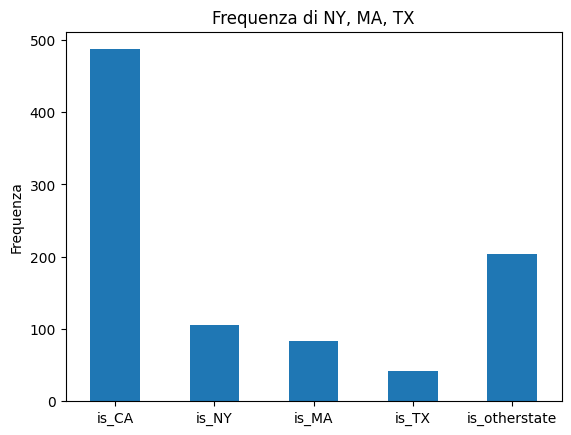

In [1145]:
# Calcola la frequenza delle colonne richieste
freq = df[["is_CA","is_NY", "is_MA", "is_TX", "is_otherstate"]].sum()

# Crea il grafico a barre
freq.plot(kind='bar')
plt.title("Frequenza di NY, MA, TX")
plt.ylabel("Frequenza")
plt.xticks(rotation=0)
plt.show()

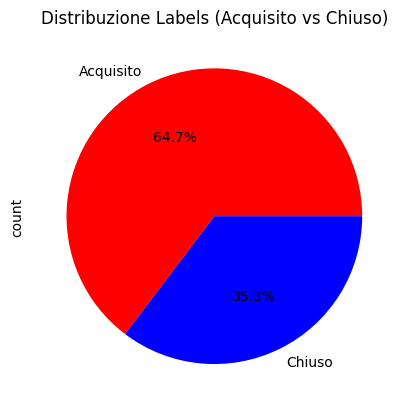

In [1146]:
df['labels'].value_counts().plot.pie(autopct='%1.1f%%', labels=['Acquisito', 'Chiuso'], colors=['Red','Blue'])
plt.title('Distribuzione Labels (Acquisito vs Chiuso)')
plt.show()

<Axes: >

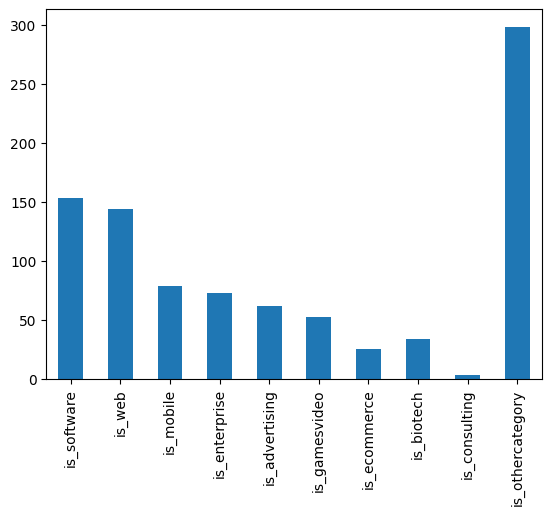

In [1147]:
freq = df[
    ["is_software", 
     "is_web", 
     "is_mobile", 
     "is_enterprise", 
     "is_advertising", 
     "is_gamesvideo", 
     "is_ecommerce", 
     "is_biotech", 
     "is_consulting", 
     "is_othercategory"]].sum()

freq.plot(kind='bar')

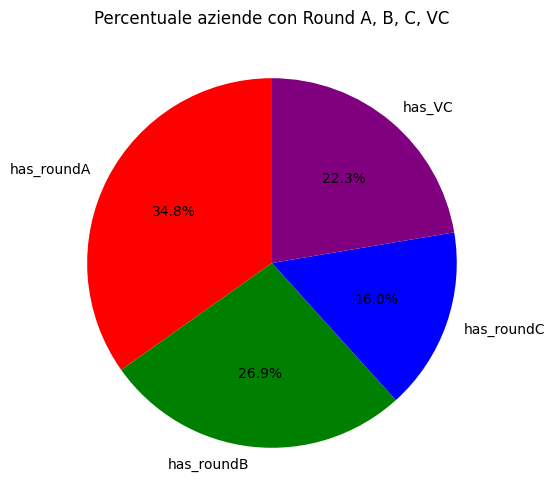

In [1148]:
round_cols = ['has_roundA', 'has_roundB', 'has_roundC', "has_VC"]
round_counts = df[round_cols].sum()
plt.figure(figsize=(6,6))
plt.pie(round_counts, labels=round_cols, autopct='%1.1f%%', startangle=90, colors=['Red','Green','Blue', "Purple"])
plt.title('Percentuale aziende con Round A, B, C, VC')
plt.show()

## Preprocessing

In [1149]:
from sklearn.model_selection import train_test_split
from sklearn import set_config

In [1150]:
set_config(transform_output="pandas")

In [1151]:
X = df.drop("labels", axis = 1)
y = df["labels"]

In [1152]:
X

,latitude,longitude,age_first_funding_year,age_last_funding_year,age_first_milestone_year,age_last_milestone_year,relationships,funding_rounds,funding_total_usd,milestones,...,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500,age_first_milestone_year_missing,age_last_milestone_year_missing,city_state_zip_freq
0,42.358880,-71.056820,2.2493,3.0027,4.6685,6.7041,3,3,375000,3,...,1,0,0,0,0,1.0000,0,0,0,2
1,37.238916,-121.973718,5.1260,9.9973,7.0055,7.0055,9,4,40100000,1,...,0,0,1,1,1,4.7500,1,0,0,1
2,32.901049,-117.192656,1.0329,1.0329,1.4575,2.2055,5,1,2600000,2,...,0,1,0,0,0,4.0000,1,0,0,8
3,37.320309,-122.050040,3.1315,5.3151,6.0027,6.0027,5,3,40000000,1,...,0,0,1,1,1,3.3333,1,0,0,8
4,37.779281,-122.419236,0.0000,1.6685,0.0384,0.0384,2,2,1300000,1,...,1,0,0,0,0,1.0000,1,0,0,23
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
918,37.740594,-122.376471,0.5178,0.5178,0.5808,4.5260,9,1,1100000,2,...,0,1,0,0,0,6.0000,1,0,0,30
919,42.504817,-71.195611,7.2521,9.2274,6.0027,6.0027,1,3,52000000,1,...,0,0,1,0,0,2.6667,1,0,0,11
920,37.408261,-122.015920,8.4959,8.4959,9.0055,9.0055,5,1,44000000,1,...,0,0,0,0,1,8.0000,1,0,0,7
921,37.556732,-122.288378,0.7589,2.8329,0.7589,3.8356,12,2,15500000,2,...,0,1,1,0,0,1.0000,1,0,0,1


In [1153]:
y

0      1
1      1
2      1
3      1
4      0
      ..
918    1
919    0
920    0
921    1
922    1
Name: labels, Length: 923, dtype: int64

In [1154]:
y.value_counts(normalize=True)

labels
1    0.646804
0    0.353196
Name: proportion, dtype: float64

## Divisione in train test split

In [1155]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=42, stratify=y)

## Baseline: Regressione Logistica
Creiamo una baseline semplice usando la regressione logistica per valutare le performance iniziali del modello.

- Per la baseline creo una pipeline con standardizzazione e modello

In [1156]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

In [1157]:
pipe = Pipeline([
    ("scaler", StandardScaler()),
    ("logreg", LogisticRegression(max_iter= 500, verbose= 1, n_jobs=-1, random_state=42))
])

In [1158]:
pipe.fit(X_train, y_train)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 20 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.1s finished


Pipeline(steps=[('scaler', StandardScaler()),
                ('logreg',
                 LogisticRegression(max_iter=500, n_jobs=-1, random_state=42,
                                    verbose=1))])

In [1159]:
y_pred_train = pipe.predict(X_train)

In [1160]:
y_pred = pipe.predict(X_test)

In [1161]:
from sklearn.metrics import accuracy_score, classification_report, ConfusionMatrixDisplay

In [1162]:
accuracy_score(y_test, y_pred)

0.7405405405405405

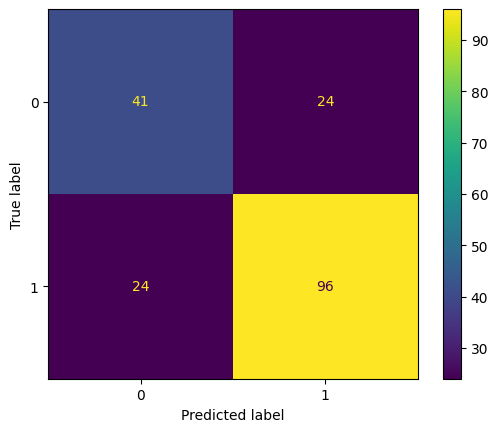

In [1163]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
plt.show()

In [1164]:
cr = classification_report(y_test, y_pred, output_dict=True)
pd.DataFrame(cr)

,0,1,accuracy,macro avg,weighted avg
precision,0.630769,0.8,0.740541,0.715385,0.740541
recall,0.630769,0.8,0.740541,0.715385,0.740541
f1-score,0.630769,0.8,0.740541,0.715385,0.740541
support,65.000000,120.0,0.740541,185.000000,185.000000


## Metriche Logistic Regression

In [1165]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, log_loss

In [1166]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

In [1167]:
accuracy_train = accuracy_score(y_train, y_pred_train)
precision_train = precision_score(y_train, y_pred_train)
recall_train = recall_score(y_train, y_pred_train)
f1_train = f1_score(y_train, y_pred_train)
roc_auc_train = roc_auc_score(y_train, y_pred_train)


In [1168]:
print(f"""
TRAIN METRICS - Logistic Regression:
Accuracy: {accuracy_train},
Precision: {precision_train}, 
Recall: {recall_train},
F1-score: {f1_train}, 
ROC-AUC: {roc_auc_train}

----------------------------

TEST METRICS - Logistic Regression:
Accuracy: {accuracy}, 
Precision: {precision}, 
Recall: {recall},
F1-score: {f1}, 
ROC-AUC: {roc_auc}
""")



TRAIN METRICS - Logistic Regression:
Accuracy: 0.7777777777777778,
Precision: 0.7992351816443595, 
Recall: 0.8763102725366876,
F1-score: 0.836, 
ROC-AUC: 0.7370057109809874

----------------------------

TEST METRICS - Logistic Regression:
Accuracy: 0.7405405405405405, 
Precision: 0.8, 
Recall: 0.8,
F1-score: 0.8, 
ROC-AUC: 0.7153846153846154



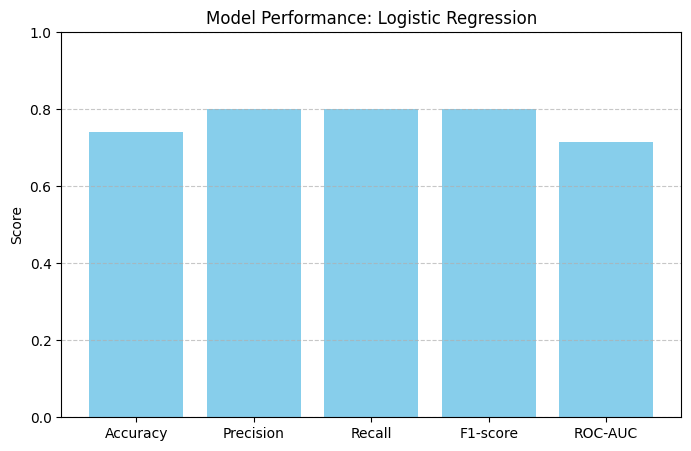

In [1169]:
metricslr = {
    'Accuracy': accuracy,
    'Precision': precision,
    'Recall': recall,
    'F1-score': f1,
    'ROC-AUC': roc_auc
}

plt.figure(figsize=(8, 5))
plt.bar(metricslr.keys(), metricslr.values(), color='skyblue')
plt.title('Model Performance: Logistic Regression')
plt.ylim(0, 1)
plt.ylabel('Score')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [1170]:
y_proba = pipe.predict_proba(X_test)[:, 1] # prendo solo la classe positiva
log_losslr = log_loss(y_test, y_proba) 
log_losslr

0.5065264004558566

## Random Forest Classifier

In [1171]:
from sklearn.ensemble import RandomForestClassifier

In [1172]:
X = df.drop("labels", axis= 1)
y = df["labels"]

In [1173]:
X

,latitude,longitude,age_first_funding_year,age_last_funding_year,age_first_milestone_year,age_last_milestone_year,relationships,funding_rounds,funding_total_usd,milestones,...,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500,age_first_milestone_year_missing,age_last_milestone_year_missing,city_state_zip_freq
0,42.358880,-71.056820,2.2493,3.0027,4.6685,6.7041,3,3,375000,3,...,1,0,0,0,0,1.0000,0,0,0,2
1,37.238916,-121.973718,5.1260,9.9973,7.0055,7.0055,9,4,40100000,1,...,0,0,1,1,1,4.7500,1,0,0,1
2,32.901049,-117.192656,1.0329,1.0329,1.4575,2.2055,5,1,2600000,2,...,0,1,0,0,0,4.0000,1,0,0,8
3,37.320309,-122.050040,3.1315,5.3151,6.0027,6.0027,5,3,40000000,1,...,0,0,1,1,1,3.3333,1,0,0,8
4,37.779281,-122.419236,0.0000,1.6685,0.0384,0.0384,2,2,1300000,1,...,1,0,0,0,0,1.0000,1,0,0,23
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
918,37.740594,-122.376471,0.5178,0.5178,0.5808,4.5260,9,1,1100000,2,...,0,1,0,0,0,6.0000,1,0,0,30
919,42.504817,-71.195611,7.2521,9.2274,6.0027,6.0027,1,3,52000000,1,...,0,0,1,0,0,2.6667,1,0,0,11
920,37.408261,-122.015920,8.4959,8.4959,9.0055,9.0055,5,1,44000000,1,...,0,0,0,0,1,8.0000,1,0,0,7
921,37.556732,-122.288378,0.7589,2.8329,0.7589,3.8356,12,2,15500000,2,...,0,1,1,0,0,1.0000,1,0,0,1


In [1174]:
y

0      1
1      1
2      1
3      1
4      0
      ..
918    1
919    0
920    0
921    1
922    1
Name: labels, Length: 923, dtype: int64

In [1175]:
y.value_counts(normalize=True) * 100

labels
1    64.68039
0    35.31961
Name: proportion, dtype: float64

In [1176]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42, shuffle=True, stratify=y)

In [1177]:
from sklearn.model_selection import StratifiedKFold, cross_val_score

In [1178]:
pipe2 = Pipeline([
    ("classifier", RandomForestClassifier(
        n_estimators=100,
        criterion="gini",
        max_depth=5,                # Limita la profondità degli alberi
        min_samples_split=10,        # Aumenta i campioni minimi per split
        min_samples_leaf=8,    
        max_features="sqrt",     # Aumenta i campioni minimi per foglia
        verbose=1,
        n_jobs=-1,
        random_state=42
    ))
])

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

scores = cross_val_score(pipe2, X_train, y_train, cv=cv, scoring='accuracy')

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 20 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=20)]: Using backend ThreadingBackend with 20 concurrent workers.
[Parallel(n_jobs=20)]: Done  10 tasks      | elapsed:    0.0s
[Parallel(n_jobs=20)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 20 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=20)]: Using backend ThreadingBackend with 20 concurrent workers.
[Parallel(n_jobs=20)]: Done  10 tasks      | elapsed:    0.0s
[Parallel(n_jobs=20)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 20 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    0

In [1179]:
print(f"Cross-validation scores: {scores}")
print(f"Mean CV accuracy: {scores.mean()}")

Cross-validation scores: [0.80405405 0.78378378 0.80405405 0.75510204 0.80272109]
Mean CV accuracy: 0.7899430042287185


In [1180]:
pipe2.fit(X_train, y_train)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 20 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.0s finished


Pipeline(steps=[('classifier',
                 RandomForestClassifier(max_depth=5, min_samples_leaf=8,
                                        min_samples_split=10, n_jobs=-1,
                                        random_state=42, verbose=1))])

In [1181]:
y_pred_train = pipe2.predict(X_train)

[Parallel(n_jobs=20)]: Using backend ThreadingBackend with 20 concurrent workers.
[Parallel(n_jobs=20)]: Done  10 tasks      | elapsed:    0.0s
[Parallel(n_jobs=20)]: Done 100 out of 100 | elapsed:    0.0s finished


In [1182]:
y_pred = pipe2.predict(X_test)

[Parallel(n_jobs=20)]: Using backend ThreadingBackend with 20 concurrent workers.
[Parallel(n_jobs=20)]: Done  10 tasks      | elapsed:    0.0s
[Parallel(n_jobs=20)]: Done 100 out of 100 | elapsed:    0.0s finished


## Metriche Random Forest Classifier

In [1183]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, log_loss

In [1184]:
class_report = classification_report(y_test, y_pred, output_dict=True)
pd.DataFrame(class_report)

,0,1,accuracy,macro avg,weighted avg
precision,0.705882,0.783582,0.762162,0.744732,0.756282
recall,0.553846,0.875000,0.762162,0.714423,0.762162
f1-score,0.620690,0.826772,0.762162,0.723731,0.754364
support,65.000000,120.000000,0.762162,185.000000,185.000000


In [1185]:
accuracyrf_train = accuracy_score(y_train, y_pred_train)
precisionrf_train = precision_score(y_train, y_pred_train)
recallrf_train = recall_score(y_train, y_pred_train)
f1rf_train = f1_score(y_train, y_pred_train)
roc_aucrf_train = roc_auc_score(y_train, y_pred_train)


In [1186]:
accuracyrf = accuracy_score(y_test, y_pred)
precisionrf = precision_score(y_test, y_pred)
recallrf = recall_score(y_test, y_pred)
f1rf = f1_score(y_test, y_pred)
roc_aucrf = roc_auc_score(y_test, y_pred)

In [1187]:
print(f""" 
TRAIN METRICS - Random Forest:
Accuracy: {accuracyrf_train},
Precision: {precisionrf_train}, 
Recall: {recallrf_train},
F1-score: {f1rf_train}, 
ROC-AUC: {roc_aucrf_train}

----------------------------

TEST METRICS - Random Forest:
Accuracy: {accuracyrf},
Precision: {precisionrf}, 
Recall: {recallrf},
F1-score: {f1rf}, 
ROC-AUC: {roc_aucrf}
""")

 
TRAIN METRICS - Random Forest:
Accuracy: 0.8224932249322493,
Precision: 0.8056537102473498, 
Recall: 0.9559748427672956,
F1-score: 0.8744007670182167, 
ROC-AUC: 0.7672594520349888

----------------------------

TEST METRICS - Random Forest:
Accuracy: 0.7621621621621621,
Precision: 0.7835820895522388, 
Recall: 0.875,
F1-score: 0.8267716535433071, 
ROC-AUC: 0.7144230769230769



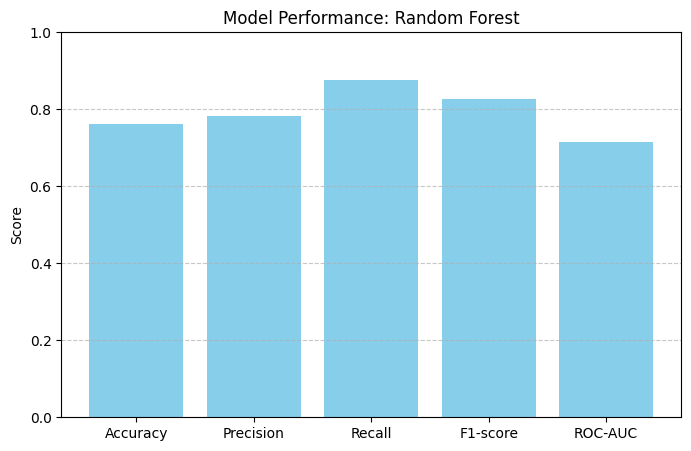

In [1188]:
metricsrf = {
    'Accuracy': accuracyrf,
    'Precision': precisionrf,
    'Recall': recallrf,
    'F1-score': f1rf,
    'ROC-AUC': roc_aucrf
}

plt.figure(figsize=(8, 5))
plt.bar(metricsrf.keys(), metricsrf.values(), color='skyblue')
plt.title('Model Performance: Random Forest')
plt.ylim(0, 1)
plt.ylabel('Score')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [1189]:
y_proba = pipe2.predict_proba(X_test)[:, 1] # prendo solo la classe positiva
log_lossrf = log_loss(y_test, y_proba) 
log_lossrf

[Parallel(n_jobs=20)]: Using backend ThreadingBackend with 20 concurrent workers.
[Parallel(n_jobs=20)]: Done  10 tasks      | elapsed:    0.0s
[Parallel(n_jobs=20)]: Done 100 out of 100 | elapsed:    0.0s finished


0.4771456119349148

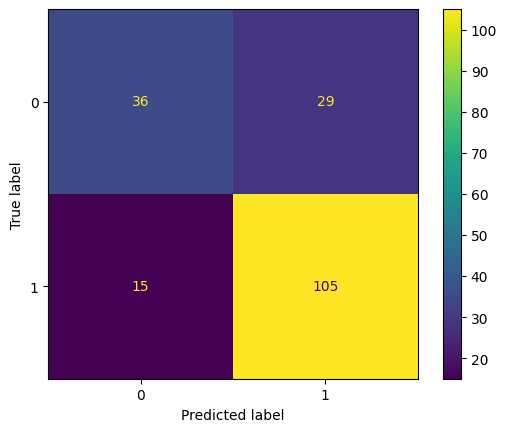

In [1190]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
plt.show()

## Confronto tra Logistic Regression e Random Forest Classifier

In [1191]:
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-score', 'ROC-AUC', 'Log Loss']
random_forest = [accuracyrf, precisionrf, recallrf, f1rf, roc_aucrf, log_lossrf]
logistic_regression = [accuracy, precision, recall, f1, roc_auc, log_losslr]

In [1192]:
df_long0 = pd.DataFrame({
    'Metric': metrics,
    'Random Forest': random_forest,
    'Logistic Regression': logistic_regression
}).melt(id_vars='Metric', var_name='Model', value_name='Score')

In [1193]:
import seaborn as sns

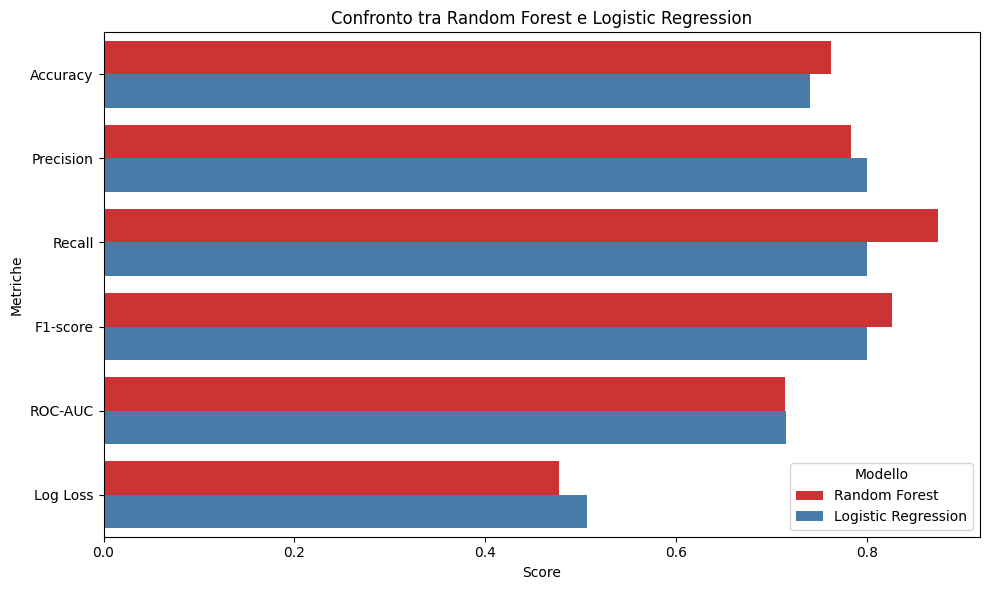

In [1194]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Score', y='Metric', hue='Model', data=df_long0, palette='Set1', orient='h')

plt.title('Confronto tra Random Forest e Logistic Regression')
plt.xlabel('Score')
plt.ylabel('Metriche')
plt.legend(title='Modello')
plt.tight_layout()
plt.show()

## Model Optimization - Grid Search

In [1195]:
pipe2.get_params()

{'memory': None,
 'steps': [('classifier',
   RandomForestClassifier(max_depth=5, min_samples_leaf=8, min_samples_split=10,
                          n_jobs=-1, random_state=42, verbose=1))],
 'transform_input': None,
 'verbose': False,
 'classifier': RandomForestClassifier(max_depth=5, min_samples_leaf=8, min_samples_split=10,
                        n_jobs=-1, random_state=42, verbose=1),
 'classifier__bootstrap': True,
 'classifier__ccp_alpha': 0.0,
 'classifier__class_weight': None,
 'classifier__criterion': 'gini',
 'classifier__max_depth': 5,
 'classifier__max_features': 'sqrt',
 'classifier__max_leaf_nodes': None,
 'classifier__max_samples': None,
 'classifier__min_impurity_decrease': 0.0,
 'classifier__min_samples_leaf': 8,
 'classifier__min_samples_split': 10,
 'classifier__min_weight_fraction_leaf': 0.0,
 'classifier__monotonic_cst': None,
 'classifier__n_estimators': 100,
 'classifier__n_jobs': -1,
 'classifier__oob_score': False,
 'classifier__random_state': 42,
 'classifie

Parametri con cui decido di lavorare: 
- n estimators
- max depth
- criterion
- min samples split
- min samples leaf
- max features

In [1196]:
params = {
    "classifier__n_estimators": [100, 200],  # Numero di alberi, evita valori troppo alti per efficienza
    "classifier__max_depth": [3, 5, 10, 20],  # Alberi meno profondi per ridurre overfitting
    "classifier__criterion": ["gini", "entropy"],
    "classifier__min_samples_split": [5, 10, 20],  # Più campioni per split = meno overfitting
    "classifier__min_samples_leaf": [4, 8, 12],    # Più campioni per foglia = meno overfitting
    "classifier__max_features": ["sqrt", "log2"],  # Limita il numero di feature considerate
    "classifier__class_weight": [None, "balanced"] # Prova anche il bilanciamento automatico
}

Decido di usare un k-fold stratificato per evitare che i dati di test vengano inclusi nel set di addestramento, garantendo così una valutazione imparziale del modello su dati mai visti prima.

In [1197]:
from sklearn.model_selection import GridSearchCV, StratifiedKFold

In [1198]:
grid_search = GridSearchCV(
    estimator=pipe2,
    param_grid=params,
    scoring="f1",
    n_jobs=-1,
    refit=True,
    cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=42),
    verbose=1
)

In [1199]:
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 576 candidates, totalling 2880 fits


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 20 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.0s finished


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=Pipeline(steps=[('classifier',
                                        RandomForestClassifier(max_depth=5,
                                                               min_samples_leaf=8,
                                                               min_samples_split=10,
                                                               n_jobs=-1,
                                                               random_state=42,
                                                               verbose=1))]),
             n_jobs=-1,
             param_grid={'classifier__class_weight': [None, 'balanced'],
                         'classifier__criterion': ['gini', 'entropy'],
                         'classifier__max_depth': [3, 5, 10, 20],
                         'classifier__max_features': ['sqrt', 'log2'],
                         'classifier__min_samples_leaf': [4, 8, 12],
                         'classifier__min_samples_split': [5, 10, 20],
                         'classifier__n_estimators': [100, 200]},
             scoring='f1', verbose=1)

In [1200]:
grid_search.best_score_

np.float64(0.8579837853897441)

In [1201]:
grid_search.best_params_

{'classifier__class_weight': None,
 'classifier__criterion': 'entropy',
 'classifier__max_depth': 5,
 'classifier__max_features': 'sqrt',
 'classifier__min_samples_leaf': 4,
 'classifier__min_samples_split': 20,
 'classifier__n_estimators': 100}

In [1202]:
random_migliorato = grid_search.best_estimator_

In [1203]:
df_grid = pd.DataFrame(grid_search.cv_results_)

In [1204]:
df_grid.sort_values(by="mean_test_score", ascending=True)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_classifier__class_weight,param_classifier__criterion,param_classifier__max_depth,param_classifier__max_features,param_classifier__min_samples_leaf,param_classifier__min_samples_split,param_classifier__n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
536,0.199412,0.045220,0.061965,0.008050,balanced,entropy,10,log2,12,10,100,"{'classifier__class_weight': 'balanced', 'clas...",0.756757,0.830769,0.810811,0.791444,0.814070,0.800770,0.025305,574
538,0.224000,0.043344,0.080870,0.003614,balanced,entropy,10,log2,12,20,100,"{'classifier__class_weight': 'balanced', 'clas...",0.756757,0.830769,0.810811,0.791444,0.814070,0.800770,0.025305,574
534,0.232044,0.061913,0.052574,0.010631,balanced,entropy,10,log2,12,5,100,"{'classifier__class_weight': 'balanced', 'clas...",0.756757,0.830769,0.810811,0.791444,0.814070,0.800770,0.025305,574
574,0.201412,0.023609,0.056552,0.012195,balanced,entropy,20,log2,12,20,100,"{'classifier__class_weight': 'balanced', 'clas...",0.756757,0.842640,0.810811,0.791444,0.814070,0.803144,0.028379,571
572,0.209829,0.040447,0.068399,0.009920,balanced,entropy,20,log2,12,10,100,"{'classifier__class_weight': 'balanced', 'clas...",0.756757,0.842640,0.810811,0.791444,0.814070,0.803144,0.028379,571
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37,0.307308,0.022447,0.065080,0.011279,None,gini,5,sqrt,4,5,200,"{'classifier__class_weight': None, 'classifier...",0.854369,0.853081,0.862745,0.836538,0.867925,0.854932,0.010695,5
41,0.340931,0.048180,0.075402,0.014715,None,gini,5,sqrt,4,20,200,"{'classifier__class_weight': None, 'classifier...",0.858537,0.849057,0.862745,0.836538,0.867925,0.854960,0.011097,4
57,0.328882,0.024580,0.064400,0.005920,None,gini,5,log2,4,10,200,"{'classifier__class_weight': None, 'classifier...",0.859903,0.853081,0.859903,0.838095,0.863850,0.854966,0.009120,3
191,0.388412,0.040444,0.085369,0.018144,None,entropy,5,sqrt,8,20,200,"{'classifier__class_weight': None, 'classifier...",0.859903,0.849057,0.859903,0.840580,0.867925,0.855474,0.009563,2


## Valutazione del modello RFC con i parametri della Grid Search

In [1205]:
y_pred_train = random_migliorato.predict(X_train)

[Parallel(n_jobs=20)]: Using backend ThreadingBackend with 20 concurrent workers.
[Parallel(n_jobs=20)]: Done  10 tasks      | elapsed:    0.0s
[Parallel(n_jobs=20)]: Done 100 out of 100 | elapsed:    0.0s finished


In [1206]:
y_pred = random_migliorato.predict(X_test)

[Parallel(n_jobs=20)]: Using backend ThreadingBackend with 20 concurrent workers.
[Parallel(n_jobs=20)]: Done  10 tasks      | elapsed:    0.0s
[Parallel(n_jobs=20)]: Done 100 out of 100 | elapsed:    0.0s finished


In [1207]:
accuracygrid_train = accuracy_score(y_train, y_pred_train)
precisiongrid_train = precision_score(y_train, y_pred_train)
recallgrid_train = recall_score(y_train, y_pred_train)
f1grid_train = f1_score(y_train, y_pred_train)
roc_aucgrid_train = roc_auc_score(y_train, y_pred_train)


In [1208]:
accuracygrid = accuracy_score(y_test, y_pred)
precisiongrid = precision_score(y_test, y_pred)
recallgrid = recall_score(y_test, y_pred)
f1grid = f1_score(y_test, y_pred)
roc_aucgrid = roc_auc_score(y_test, y_pred)

In [1209]:
print(f""" 
TRAIN METRICS - Grid Search - Random Forest:
Accuracy: {accuracygrid_train},
Precision: {precisiongrid_train}, 
Recall: {recallgrid_train},
F1-score: {f1grid_train}, 
ROC-AUC: {roc_aucgrid_train}

----------------------------

TEST METRICS - Grid Search - Random Forest:
Accuracy: {accuracygrid},
Precision: {precisiongrid}, 
Recall: {recallgrid},
F1-score: {f1grid}, 
ROC-AUC: {roc_aucgrid}
""")

 
TRAIN METRICS - Grid Search - Random Forest:
Accuracy: 0.8292682926829268,
Precision: 0.8128342245989305, 
Recall: 0.9559748427672956,
F1-score: 0.8786127167630058, 
ROC-AUC: 0.7768379960962914

----------------------------

TEST METRICS - Grid Search - Random Forest:
Accuracy: 0.7621621621621621,
Precision: 0.7835820895522388, 
Recall: 0.875,
F1-score: 0.8267716535433071, 
ROC-AUC: 0.7144230769230769



In [1210]:
report_migliorato = classification_report(y_test, y_pred, output_dict=True)
pd.DataFrame(report_migliorato)

,0,1,accuracy,macro avg,weighted avg
precision,0.705882,0.783582,0.762162,0.744732,0.756282
recall,0.553846,0.875000,0.762162,0.714423,0.762162
f1-score,0.620690,0.826772,0.762162,0.723731,0.754364
support,65.000000,120.000000,0.762162,185.000000,185.000000


In [1211]:
y_prob = random_migliorato.predict_proba(X_test)[:, 1]  # Probabilità per la classe positiva
logloss_grid = log_loss(y_test, y_prob)

[Parallel(n_jobs=20)]: Using backend ThreadingBackend with 20 concurrent workers.
[Parallel(n_jobs=20)]: Done  10 tasks      | elapsed:    0.0s
[Parallel(n_jobs=20)]: Done 100 out of 100 | elapsed:    0.0s finished


In [1212]:
logloss_grid

0.4669201742636356

Confronto nuovo modello vs vecchio

In [1213]:
metrics_new = ['Accuracy', 'Precision', 'Recall', 'F1-score', 'ROC-AUC', 'Log Loss']
random_forest = [accuracyrf, precisionrf, recallrf, f1rf, roc_aucrf, log_lossrf]
random_forest_gridsearch = [accuracygrid, precisiongrid, recallgrid, f1grid, roc_aucgrid, logloss_grid]

In [1214]:
df_long = pd.DataFrame({
    'Metric': metrics_new,
    'Random Forest': random_forest,
    'RF Grid Search': random_forest_gridsearch
}).melt(id_vars='Metric', var_name='Model', value_name='Score')

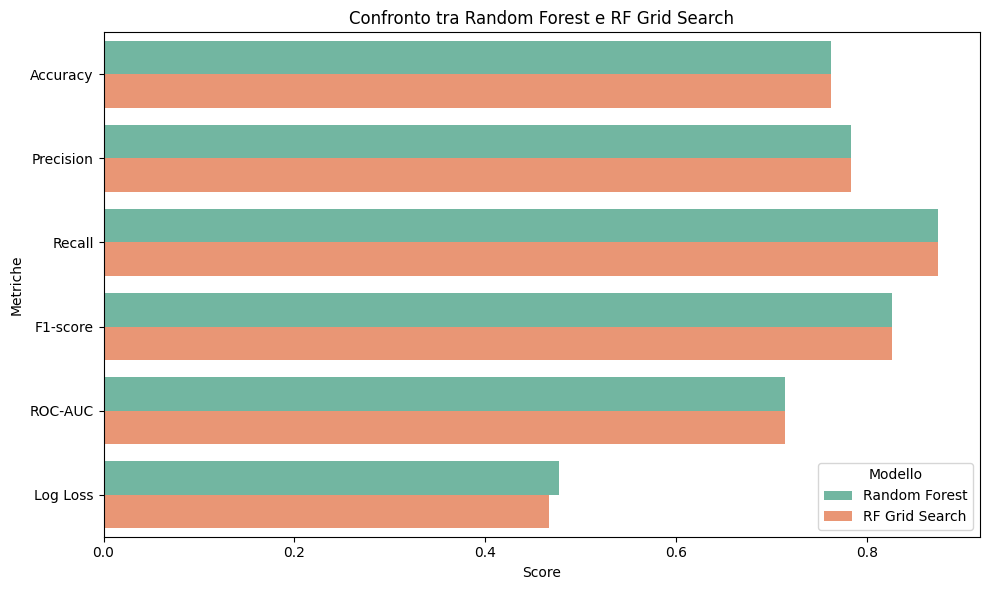

In [1215]:
# Plot comparativo
plt.figure(figsize=(10, 6))
sns.barplot(x='Score', y='Metric', hue='Model', data=df_long, palette='Set2', orient='h')

plt.title('Confronto tra Random Forest e RF Grid Search')
plt.xlabel('Score')
plt.ylabel('Metriche')
plt.legend(title='Modello')
plt.tight_layout()
plt.show()

## Optuna Model Selection

Dato che con la grid search, i parametri da me selezionati, non migliorano il modello, decido di optare per il bayesian search

In [1216]:
import optuna
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score, accuracy_score, log_loss

In [1217]:
def objective(trial):
    params = {
        'n_estimators': trial.suggest_int('n_estimators', 50, 500),
        'max_depth': trial.suggest_int('max_depth', 5, 50),
        'min_samples_split': trial.suggest_int('min_samples_split', 2, 10),
        'min_samples_leaf': trial.suggest_int('min_samples_leaf', 1, 8),
        'max_features': trial.suggest_categorical('max_features', ['sqrt', 'log2', None]),
        'criterion': trial.suggest_categorical('criterion', ['gini', 'entropy']),
        'random_state': 42,
        'n_jobs': -1
    }
    clf = RandomForestClassifier(**params)
    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    score = cross_val_score(clf, X_train, y_train, cv=cv, scoring='f1', n_jobs=-1)
    return score.mean()

In [1218]:
study6 = optuna.create_study(storage="sqlite:///study6.db", direction='minimize', study_name="optuna_study6", load_if_exists=True)

[I 2025-05-21 20:18:38,892] Using an existing study with name 'optuna_study6' instead of creating a new one.


In [1219]:
study6.optimize(objective, n_trials=10, show_progress_bar=False)

[I 2025-05-21 20:18:39,386] Trial 370 finished with value: 0.8468599314592413 and parameters: {'n_estimators': 210, 'max_depth': 5, 'min_samples_split': 8, 'min_samples_leaf': 3, 'max_features': None, 'criterion': 'entropy'}. Best is trial 326 with value: 0.4173436945178171.
[I 2025-05-21 20:18:39,856] Trial 371 finished with value: 0.844600231687979 and parameters: {'n_estimators': 230, 'max_depth': 7, 'min_samples_split': 8, 'min_samples_leaf': 3, 'max_features': None, 'criterion': 'entropy'}. Best is trial 326 with value: 0.4173436945178171.
[I 2025-05-21 20:18:40,274] Trial 372 finished with value: 0.8448698267784074 and parameters: {'n_estimators': 200, 'max_depth': 6, 'min_samples_split': 8, 'min_samples_leaf': 3, 'max_features': None, 'criterion': 'entropy'}. Best is trial 326 with value: 0.4173436945178171.
[I 2025-05-21 20:18:40,633] Trial 373 finished with value: 0.8511004116733242 and parameters: {'n_estimators': 222, 'max_depth': 5, 'min_samples_split': 8, 'min_samples_leaf

In [1220]:
print('Best trial:')
print(study6.best_trial)
print('Best params:')
print(study6.best_params)

best_rf = RandomForestClassifier(**study6.best_params)
best_rf.fit(X_train, y_train)
y_pred = best_rf.predict(X_test)
y_pred_train = best_rf.predict(X_train)
y_prob = best_rf.predict_proba(X_test)[:, 1]
y_prob_train = best_rf.predict_proba(X_train)[:, 1]
print('Accuracy:', accuracy_score(y_test, y_pred))
print('F1-score:', f1_score(y_test, y_pred))
print('Log Loss:', log_loss(y_test, y_prob))

Best trial:
FrozenTrial(number=326, state=1, values=[0.4173436945178171], datetime_start=datetime.datetime(2025, 5, 21, 19, 24, 29, 41312), datetime_complete=datetime.datetime(2025, 5, 21, 19, 24, 29, 331358), params={'n_estimators': 209, 'max_depth': 5, 'min_samples_split': 8, 'min_samples_leaf': 3, 'max_features': None, 'criterion': 'entropy'}, user_attrs={}, system_attrs={}, intermediate_values={}, distributions={'n_estimators': IntDistribution(high=500, log=False, low=50, step=1), 'max_depth': IntDistribution(high=50, log=False, low=5, step=1), 'min_samples_split': IntDistribution(high=10, log=False, low=2, step=1), 'min_samples_leaf': IntDistribution(high=8, log=False, low=1, step=1), 'max_features': CategoricalDistribution(choices=('sqrt', 'log2', None)), 'criterion': CategoricalDistribution(choices=('gini', 'entropy'))}, trial_id=327, value=None)
Best params:
{'n_estimators': 209, 'max_depth': 5, 'min_samples_split': 8, 'min_samples_leaf': 3, 'max_features': None, 'criterion': '

In [1221]:
study6.trials_dataframe()

,number,value,datetime_start,datetime_complete,duration,params_criterion,params_max_depth,params_max_features,params_min_samples_leaf,params_min_samples_split,params_n_estimators,state
0,0,0.462774,2025-05-21 18:57:46.553512,2025-05-21 18:57:46.797203,0 days 00:00:00.243691,entropy,30,sqrt,7,2,185,COMPLETE
1,1,0.442462,2025-05-21 18:57:46.813891,2025-05-21 18:57:47.236651,0 days 00:00:00.422760,entropy,42,None,1,5,349,COMPLETE
2,2,0.436554,2025-05-21 18:57:47.259167,2025-05-21 18:57:47.474075,0 days 00:00:00.214908,entropy,16,None,3,9,138,COMPLETE
3,3,0.458941,2025-05-21 18:57:47.489387,2025-05-21 18:57:47.999908,0 days 00:00:00.510521,gini,49,log2,1,10,446,COMPLETE
4,4,0.436613,2025-05-21 18:57:48.023949,2025-05-21 18:57:48.307826,0 days 00:00:00.283877,entropy,15,None,6,10,208,COMPLETE
...,...,...,...,...,...,...,...,...,...,...,...,...
375,375,0.844600,2025-05-21 20:18:41.087566,2025-05-21 20:18:41.507291,0 days 00:00:00.419725,entropy,7,None,3,8,212,COMPLETE
376,376,0.846836,2025-05-21 20:18:41.530446,2025-05-21 20:18:41.931124,0 days 00:00:00.400678,entropy,5,None,3,7,228,COMPLETE
377,377,0.844870,2025-05-21 20:18:41.954311,2025-05-21 20:18:42.338234,0 days 00:00:00.383923,entropy,6,None,3,8,196,COMPLETE
378,378,0.846860,2025-05-21 20:18:42.361914,2025-05-21 20:18:42.739385,0 days 00:00:00.377471,entropy,5,None,3,8,211,COMPLETE


In [1222]:
accuracyopt_train = accuracy_score(y_train, y_pred_train)
precisionopt_train = precision_score(y_train, y_pred_train)
recallopt_train = recall_score(y_train, y_pred_train)
f1opt_train = f1_score(y_train, y_pred_train)
roc_aucopt_train = roc_auc_score(y_train, y_prob_train)
loglossopt_train = log_loss(y_train, y_prob_train)

In [1223]:
accuracyopt = accuracy_score(y_test, y_pred)
precisionopt = precision_score(y_test, y_pred)
recallopt = recall_score(y_test, y_pred)
f1opt = f1_score(y_test, y_pred)
roc_aucopt = roc_auc_score(y_test, y_prob)
loglossopt = log_loss(y_test, y_prob)

In [1237]:
print(f""" 
TRAIN METRICS - Optuna Model:
Accuracy:   {accuracyopt_train}
Precision:  {precisionopt_train}
Recall:     {recallopt_train}
F1-score:   {f1opt_train}
ROC-AUC:    {roc_aucopt_train}
Log Loss:   {loglossopt_train}

----------------------------

TEST METRICS - Optuna Model:
Accuracy:   {accuracyopt}
Precision:  {precisionopt}
Recall:     {recallopt}
F1-score:   {f1opt}
ROC-AUC:    {roc_aucopt}
Log Loss:   {loglossopt}
""")


 
TRAIN METRICS - Optuna Model:
Accuracy:   0.8414634146341463
Precision:  0.8157894736842105
Recall:     0.9748427672955975
F1-score:   0.8882521489971347
ROC-AUC:    0.9318216503208913
Log Loss:   0.3533853619903981

----------------------------

TEST METRICS - Optuna Model:
Accuracy:   0.8054054054054054
Precision:  0.8
Recall:     0.9333333333333333
F1-score:   0.8615384615384616
ROC-AUC:    0.8707692307692307
Log Loss:   0.41804294735947256



In [1225]:
metrics_new_opt = ['Accuracy', 'Precision', 'Recall', 'F1-score', 'ROC-AUC', 'Log Loss']
optuna = [accuracyopt, precisionopt, recallopt, f1opt, roc_aucopt, loglossopt]
random_forest_gridsearch = [accuracygrid, precisiongrid, recallgrid, f1grid, roc_aucgrid, logloss_grid]

In [1226]:
df_long1 = pd.DataFrame({
    'Metric': metrics_new_opt,
    'RF Optuna': optuna,
    'RF Grid Search': random_forest_gridsearch
}).melt(id_vars='Metric', var_name='Model', value_name='Score')

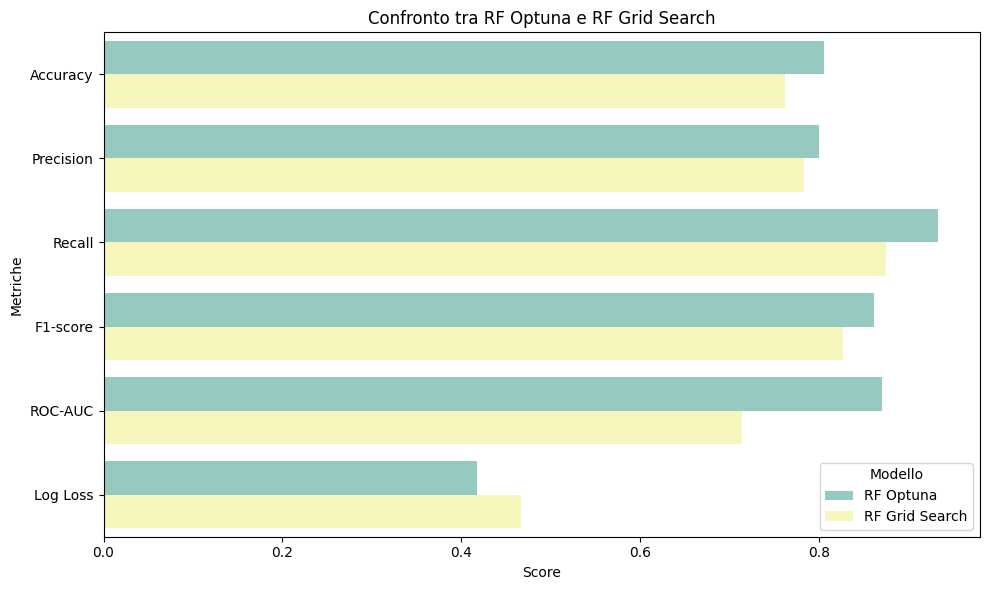

In [1227]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Score', y='Metric', hue='Model', data=df_long1, palette='Set3', orient='h')

plt.title('Confronto tra RF Optuna e RF Grid Search')
plt.xlabel('Score')
plt.ylabel('Metriche')
plt.legend(title='Modello')
plt.tight_layout()
plt.show()

Dal grafico possiamo notare che i parametri trovati dal bayesian search, performano meglio del gridsearch

In [1228]:
metrics_new_rfopt = ['Accuracy', 'Precision', 'Recall', 'F1-score', 'ROC-AUC', 'Log Loss']
random_forest = [accuracyrf, precisionrf, recallrf, f1rf, roc_aucrf, log_lossrf]
optuna = [accuracyopt, precisionopt, recallopt, f1opt, roc_aucopt, loglossopt]

In [1229]:
df_long2 = pd.DataFrame({
    'Metric': metrics_new_rfopt,
    'Random Forest': random_forest,
    'RF Optuna': optuna
}).melt(id_vars='Metric', var_name='Model', value_name='Score')

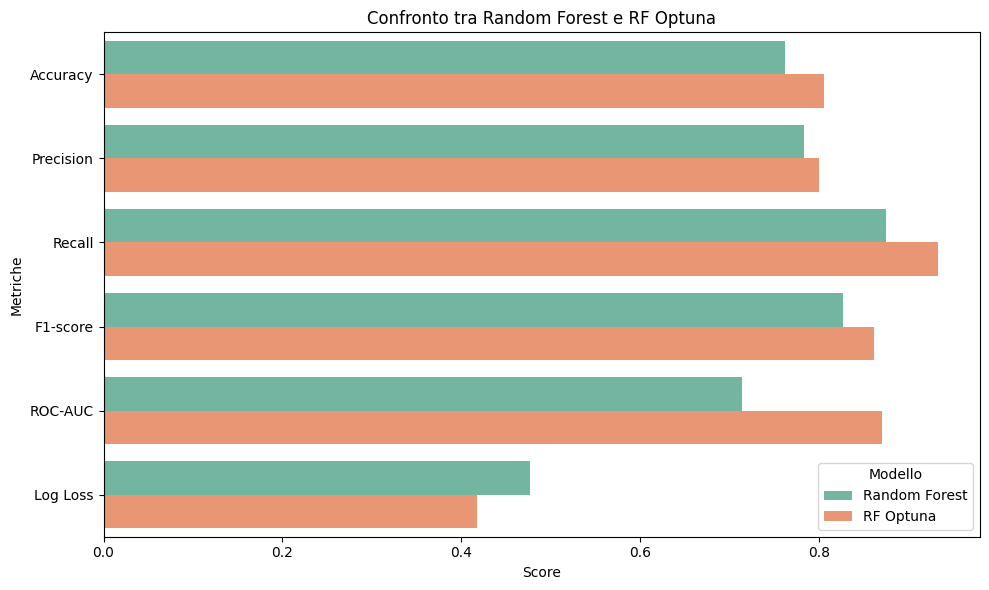

In [1230]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Score', y='Metric', hue='Model', data=df_long2, palette='Set2', orient='h')

plt.title('Confronto tra Random Forest e RF Optuna')
plt.xlabel('Score')
plt.ylabel('Metriche')
plt.legend(title='Modello')
plt.tight_layout()
plt.show()

## Esplorazione: Optuna Optimization

In [1231]:
import optuna.visualization as opt

In [1232]:
opt.plot_optimization_history(study6)

In [1233]:
opt.plot_param_importances(study6)

In [1234]:
opt.plot_parallel_coordinate(study6)

In [1235]:
opt.plot_slice(study6)

In [1236]:
opt.plot_edf(study6)